In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [83]:
def vingette(image):
    rows, cols = image.shape[:2] # initializing rows and columns

    # Create a Gaussian filter
    kernel_x = cv2.getGaussianKernel(cols, 195) # create gaussian distribution for the shape of for columns (808, 1)
    kernel_y = cv2.getGaussianKernel(rows, 195) # creates a gaussian distribution for the shape of the rows (938, 1)
    kernel = kernel_y @ np.transpose(kernel_x) # multiplies the kernels by each other to get the kernel for the final image
    filter = 255 * kernel / np.linalg.norm(kernel)

    vingette_image = np.copy(image)
    layers = image.shape[-1]

    for layer in range(layers):
        vingette_image[:, :, layer] = vingette_image[:, :, layer] * filter # multiplying each layer by the filter

    plt.title('Vignetted Bozu')
    plt.imshow(vingette_image)
    plt.show()
    cv2.imwrite('Vingette Bozu.png', vingette_image)

In [78]:
def sepia(image):
    kernel = np.array([[0.393, 0.769, 0.189],
                       [0.349, 0.686, 0.168],
                       [0.272, 0.534, 0.131]])

    # multiply each layer (r, g, b) by the corresponding array to convert to sepia
    sepia_img = cv2.transform(image, kernel)

    return sepia_img

def sharpen(image):
    kernel = np.array([[-1, -1, -1], 
                       [-1, 9.5, -1], 
                       [-1, -1, -1]])
    sharpened_img = cv2.filter2D(image, -1, kernel) # change the pixel intensity value of an image based on the surrounding pixel intensity values

    return sharpened_img


def sharpened_sepia(image):
    sepia_img = sepia(image)
    sharpened_img = sharpen(sepia_img)

    plt.title('Sharpened Sepia image')
    plt.imshow(sharpened_img)
    plt.show()

    plt.savefig('sepia_bozu')

    return sharpened_img


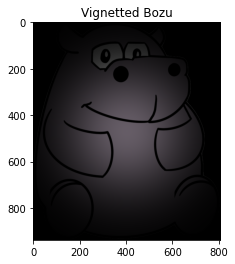

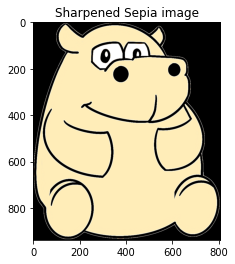

Thank you for using our program!


<Figure size 432x288 with 0 Axes>

In [79]:
bozu_img = cv2.imread('Bozu.png')

options_dict = {
    '1': vingette,
    '2': sharpened_sepia
}

choice = input("Enter 1 to vignette Bozu\n2 to get a sharpened, sepia bozu\nor 3 to exit\nYour choice: ")

while choice != '3':
    if choice not in options_dict.keys():
        print('Invalid choice')
    else:
        # Nice documentation for this trick --> https://www.geeksforgeeks.org/python-store-function-as-dictionary-value/
        options_dict[choice](bozu_img)

    choice = input("Enter 1 to vignette Bozu\nYour choice: ")


print("Thank you for using our program!")
